In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('tripadvisor_hotel_reviews.csv')

In [3]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


<AxesSubplot:xlabel='Rating', ylabel='count'>

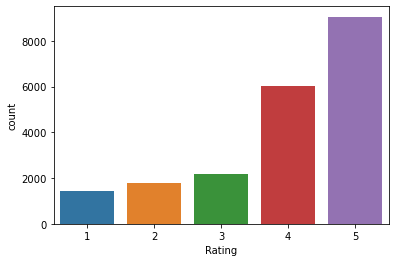

In [6]:
# countplot depicting the counts for each rating
sns.countplot(x='Rating',data=df)

In [7]:
# converting ratings 1 and 2 to 0, 3 to 1, 4 and 5 to 2
df['Rating']=df['Rating'].map({1:0,2:0,3:1,4:2,5:2})

In [8]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,2
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,1
3,"unique, great stay, wonderful time hotel monac...",2
4,"great stay great stay, went seahawk game aweso...",2


<AxesSubplot:xlabel='Rating', ylabel='count'>

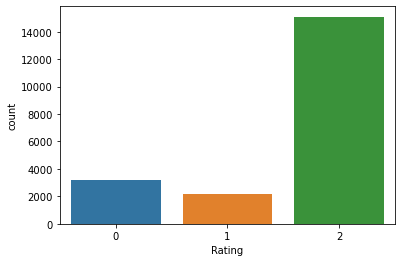

In [9]:
sns.countplot(x='Rating',data=df)

In [10]:
#changing the text to lower-case
df['Review']=df['Review'].apply(lambda x:x.lower())

In [11]:
import re

In [12]:
text=df.loc[2,'Review']

In [13]:
# checking on an example for removing non alphabetical characters
re.sub(r'[^a-z]+',' ',text)

'nice rooms not experience hotel monaco seattle good hotel n t level positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wakeup calls concierge busy hard touch did n t provide guidance special requests tv hard use ipod sound dock suite non functioning decided book mediterranean suite night weekend stay st choice rest party filled comparison w spent night larger square footage room great soaking tub whirlpool jets nice shower before stay hotel arrange car service price tip reasonable driver waiting arrival checkin easy downside room picked person jacuzi tub no bath accessories salts bubble bath did n t stay night got a checked voucher bottle champagne nice gesture fish waiting room impression room huge open space felt room big tv far away bed chore change channel ipod dock broken disappointing in morning way asked desk check thermostat said f degrees warm try cover face nig

In [14]:
#replacing all non alphabetical characters by spaces
df['Review']=df['Review'].apply(lambda x:re.sub(r'[^a-z]+',' ',x))

In [15]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,2
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not experience hotel monaco seattle...,1
3,unique great stay wonderful time hotel monaco ...,2
4,great stay great stay went seahawk game awesom...,2


In [16]:
#removing hyperlinks
df['Review']=df['Review'].apply(lambda x:re.sub('http[s]?://\S+',' ', x))

In [17]:
#multiple spaces to a single space
df['Review']=df['Review'].apply(lambda x:' '.join(x.split()))

In [18]:
#adding a column of length for better insights to the data
df['length']=df['Review'].apply(len)

In [19]:
df.head()

,Review,Rating,length
0,nice hotel expensive parking got good deal sta...,2,577
1,ok nothing special charge diamond member hilto...,0,1646
2,nice rooms not experience hotel monaco seattle...,1,1372
3,unique great stay wonderful time hotel monaco ...,2,583
4,great stay great stay went seahawk game awesom...,2,1241


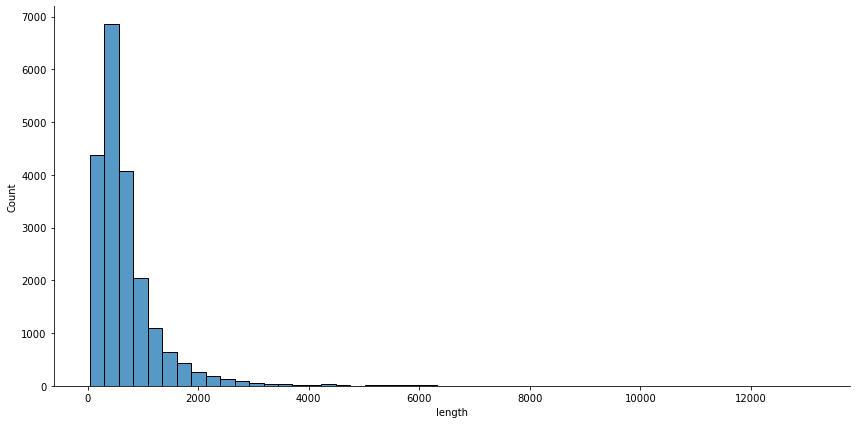

In [20]:
#histogram for lengths
sns.displot(df['length'],aspect=2,height=6,bins=50)

#lengths mostly in the range of 0 to 3000

<AxesSubplot:xlabel='Rating', ylabel='length'>

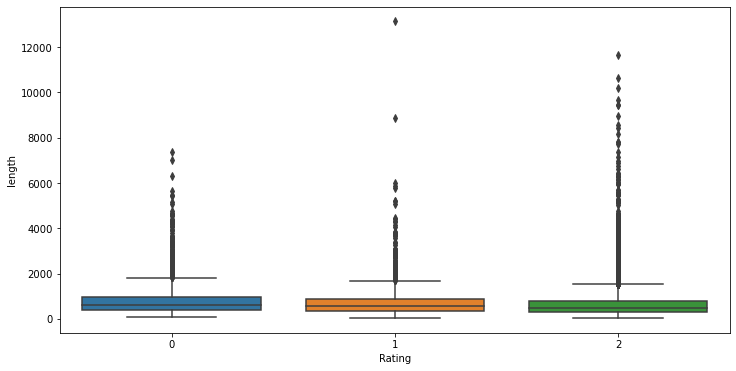

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Rating',y='length',data=df)

In [21]:
#mean length of reviews rating wise
df.groupby('Rating')['length'].mean()

Rating
0    794.929371
1    757.237179
2    672.370370
Name: length, dtype: float64

In [22]:
import nltk

#nltk.download_shell()

from nltk.corpus import stopwords

In [23]:
df.head()

,Review,Rating,length
0,nice hotel expensive parking got good deal sta...,2,577
1,ok nothing special charge diamond member hilto...,0,1646
2,nice rooms not experience hotel monaco seattle...,1,1372
3,unique great stay wonderful time hotel monaco ...,2,583
4,great stay great stay went seahawk game awesom...,2,1241


In [24]:
#function for tokenizing the reviews and removing stopwords
def func(message):
    return [word for word in message.split() if word.lower() not in stopwords.words('english')]

In [25]:
df.loc[0,'Review']

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay parking night'

In [26]:
#after removing the stopwords
" ".join(func(df.loc[0,'Review']))

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night'

In [27]:
#removing stopwords for the entire column of reviews
df['Review']=df['Review'].apply(func)

In [28]:
#removing the length column
df.drop('length',axis=1,inplace=True)

df.head()

,Review,Rating
0,"[nice, hotel, expensive, parking, got, good, d...",2
1,"[ok, nothing, special, charge, diamond, member...",0
2,"[nice, rooms, experience, hotel, monaco, seatt...",1
3,"[unique, great, stay, wonderful, time, hotel, ...",2
4,"[great, stay, great, stay, went, seahawk, game...",2


In [29]:
from nltk.stem import PorterStemmer

In [30]:
def porter_stemmer(word):
    stemmer_porter=PorterStemmer()
    return [stemmer_porter.stem(w) for w in word]

In [31]:
#stemming using Porter Stemmer
df['Review']=df['Review'].apply(porter_stemmer)

In [32]:
df.head()

,Review,Rating
0,"[nice, hotel, expens, park, got, good, deal, s...",2
1,"[ok, noth, special, charg, diamond, member, hi...",0
2,"[nice, room, experi, hotel, monaco, seattl, go...",1
3,"[uniqu, great, stay, wonder, time, hotel, mona...",2
4,"[great, stay, great, stay, went, seahawk, game...",2


In [33]:
#Rejoining the lists to form the review column
df['Review']=df['Review'].apply(lambda x:" ".join(x))

df.head()

,Review,Rating
0,nice hotel expens park got good deal stay hote...,2
1,ok noth special charg diamond member hilton de...,0
2,nice room experi hotel monaco seattl good hote...,1
3,uniqu great stay wonder time hotel monaco loca...,2
4,great stay great stay went seahawk game awesom...,2
